In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scipy function for fitting
from scipy.optimize import curve_fit

In [4]:
# Параметры рисования картинок, можно менять глобально здесь или локально
plt.rcParams.update({
    'font.size': 30,
    'figure.figsize': (13, 10),
    'axes.grid': True,
    'grid.linestyle': '-',
    'grid.alpha': 0.2,
    'lines.markersize': 5.0,
    'xtick.minor.visible': True,
    'xtick.direction': 'in',
    'xtick.major.size': 30.0,
    'xtick.minor.size': 20.0,
    'xtick.top': False,
    'xtick.bottom': False,
    'ytick.minor.visible': True,
    'ytick.direction': 'in',
    'ytick.major.size': 30.0,
    'ytick.minor.size': 20.0,
    'ytick.right': True,
    'errorbar.capsize': 0.0,
    #'tex.usetex': True,
    #'axes.titlepad' : 0.8, 
})
plt.rcParams['text.usetex'] = False

In [12]:
# Функция, из которой просто достать x0
def pol1_fit (x, k, x0):
    return k * (x - x0)

In [13]:
# То же самое, только по-другому
def pol1_fit_default (x, k, b):
    return k * x + b

### Read data

In [7]:
data = pd.read_csv('data.csv')
data

,FileName,SPS Plot,SPS_mu0,SPS_sig0,SPS_Gain,SPS_sGain,SPS_Npe,SPS_lambda,SPS_mean,SPS_stdev,...,Gauss1_Integral,Gauss1_Chi2,Gauss1_NDF,SPS_hist_entries,SPS_Gain_err,Gauss0_mean_err,Gauss1_mean_err,SPS_lambda_err,SiPM_Voltage,Temperature
0,08112021_SPS_T25p00_40p00V.root,08112021_SPS_T25p00_40p00V_SPS.png,219.268,3.81543,12.3776,0.698683,0.956849,0.002765,214.249,61.0279,...,13625,16.04570,6,40020,0.045908,0.092915,0.092145,0.004296,40.00,25.00
1,08112021_SPS_T25p04_40p25V.root,08112021_SPS_T25p04_40p25V_SPS.png,219.031,3.99295,13.8333,-0.485575,1.015750,0.009681,211.698,68.6865,...,13638,2.99568,6,40018,0.035962,0.077428,0.083928,0.004267,40.25,25.04
2,08112021_SPS_T25p05_40p50V.root,08112021_SPS_T25p05_40p50V_SPS.png,219.056,3.94997,15.1026,0.936128,1.074970,0.008425,212.917,70.7427,...,13326,7.15750,8,40017,0.033728,0.063708,0.066375,0.004202,40.50,25.05
3,08112021_SPS_T25p05_40p75V.root,08112021_SPS_T25p05_40p75V_SPS.png,219.150,4.10776,16.4827,0.981034,1.092530,0.018613,218.923,65.7679,...,13190,10.60710,8,40019,0.031085,0.065850,0.060136,0.003819,40.75,25.05
4,08112021_SPS_T25p06_41p00V.root,08112021_SPS_T25p06_41p00V_SPS.png,219.022,4.18477,17.7856,1.143580,0.967151,0.024954,212.112,74.0372,...,12868,27.70290,10,40018,0.032268,0.050102,0.057602,0.003961,41.00,25.06
5,08112021_SPS_T25p06_41p25V.root,08112021_SPS_T25p06_41p25V_SPS.png,219.058,4.26249,19.1577,1.485310,0.997822,0.024502,223.955,60.4294,...,13399,20.29130,10,40018,0.033210,0.051272,0.056906,0.003869,41.25,25.06
6,08112021_SPS_T25p07_41p50V.root,08112021_SPS_T25p07_41p50V_SPS.png,219.071,4.24931,20.5315,1.664850,1.020160,0.030007,226.353,60.4022,...,13266,10.92480,12,40009,0.031493,0.044392,0.048815,0.003931,41.50,25.07
7,08112021_SPS_T25p07_41p75V.root,08112021_SPS_T25p07_41p75V_SPS.png,218.955,4.30810,21.8471,1.706970,1.036770,0.034338,219.978,73.5972,...,12905,33.99470,12,40018,0.030626,0.043841,0.047876,0.003784,41.75,25.07
8,08112021_SPS_T25p08_42p00V.root,08112021_SPS_T25p08_42p00V_SPS.png,219.082,4.32540,23.0801,1.920830,1.052220,0.040138,222.511,73.6431,...,12759,27.12240,12,40019,0.030511,0.045241,0.049270,0.003922,42.00,25.08
9,08112021_SPS_T25p08_42p25V.root,08112021_SPS_T25p08_42p25V_SPS.png,218.875,4.32669,24.4558,2.309530,1.066880,0.048107,224.320,74.7285,...,12575,57.54170,14,40020,0.032618,0.042621,0.047894,0.003809,42.25,25.08


In [10]:
# Только те колонки, которые нужны
data[['SiPM_Voltage', 'SPS_Gain', 'SPS_Gain_err']]

,SiPM_Voltage,SPS_Gain,SPS_Gain_err
0,40.00,12.3776,0.045908
1,40.25,13.8333,0.035962
2,40.50,15.1026,0.033728
3,40.75,16.4827,0.031085
4,41.00,17.7856,0.032268
5,41.25,19.1577,0.033210
6,41.50,20.5315,0.031493
7,41.75,21.8471,0.030626
8,42.00,23.0801,0.030511
9,42.25,24.4558,0.032618


### Находим параметры для функции y = k(x - x0) 

In [14]:
# Берём функцию x = k * (x - x0) и фитируем ею
# popt - оптимальные парметры k, x0
# pcov - матрица ковариаций эттих параметров
# ошибки параметров - корни из диагональных элементов этой матриц
# k_err = sqrt(pcov[0][0])
# x0_err = sqrt(pcov[1][1])

popt, pcov = curve_fit(pol1_fit,
                       data['SiPM_Voltage'],
                       data['SPS_Gain'],
                       sigma=data['SPS_Gain_err'],
                       absolute_sigma=True)

### Ошибки парметров - диагональные элементы последеней матрицы

In [22]:
# Parameters
display(popt)
# Variance-Covariance matrix
display(pcov)
# Root square from Variance-Covariance matrix
display(np.sqrt(pcov))

array([ 5.343206  , 37.66831508])

array([[1.78001517e-04, 1.22466756e-04],
       [1.22466756e-04, 8.77326606e-05]])

array([[0.01334172, 0.01106647],
       [0.01106647, 0.00936657]])

In [18]:
# Параметры с ошибками
k = popt[0]
k_err = np.sqrt(pcov[0][0])
x0 = popt[1]
x0_err = np.sqrt(pcov[1][1])

In [23]:
print('x = k * (x - x0)')
print()
print(f'k = {k} +/- {k_err}')
print('BD voltage:')
print(f'BD = x0 = {x0} +/- {x0_err}')

x = k * (x - x0)

k = 5.343205999353933 +/- 0.013341720905698967
BD voltage:
BD = x0 = 37.668315079146716 +/- 0.009366571440785268


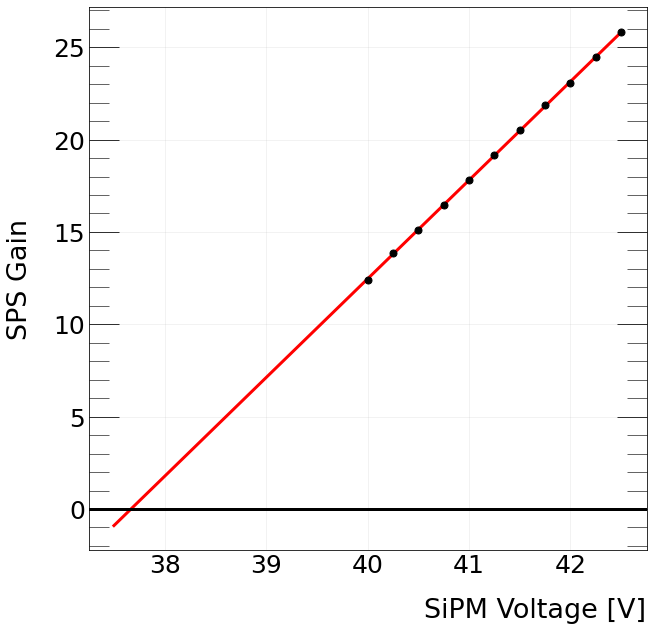

In [25]:
# График

fig, ax = plt.subplots(1, figsize=[10,10])

plt.errorbar(x=data['SiPM_Voltage'],
             y=data['SPS_Gain'],
             yerr=data['SPS_Gain_err'], fmt='ok',
             elinewidth=2.5,
             markersize=7);

xfine = np.linspace(37.5, 42.5)  # define values to plot the function for

plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('SiPM Voltage [V]', loc='right', fontsize=27, labelpad=20)
plt.ylabel('SPS Gain', fontsize=27, labelpad=20)

plt.plot(xfine, pol1_fit(xfine, popt[0], popt[1]), 'r-', linewidth=3)
plt.axhline(y=0., color='black', linestyle='-', linewidth=3)

#plt.savefig('Gain_BD_Errobar.jpg')

### Находим параметры для функции y = kx + b 

In [38]:
popt_new, pcov_new = curve_fit(pol1_fit_default,
                               data['SiPM_Voltage'],
                               data['SPS_Gain'],
                               sigma=data['SPS_Gain_err'],
                               absolute_sigma=True)

### Теперь BD voltage (x0) нужно искать по-другому

In [39]:
# Parameters
display(popt_new)
# Variance-Covariance matrix
display(pcov_new)

array([   5.34320599, -201.26956688])

array([[ 1.78001529e-04, -7.35938283e-03],
       [-7.35938283e-03,  3.04369139e-01]])

### y0 = 0, x0 = -b / k

In [40]:
# Параметры с ошибками
k = popt_new[0]
k_err = np.sqrt(pcov_new[0][0])
b = popt_new[1]
b_err = np.sqrt(pcov_new[1][1])
# x0 = -b / k
x0 = -popt_new[1] / popt_new[0]

x0 error = 0.009366571888506736


### В общем виде эта формула страшная, но для функции двух переменных вот так

![FORMULA](Error_prop.png)

In [41]:
# из формулы косвенных ошибок
x0_err = np.sqrt((pcov_new[1][1]/popt_new[0]**2) + ((popt_new[1]/popt_new[0]**2)**2)*pcov_new[0][0] - 2*(popt_new[1]/popt_new[0]**3)*pcov_new[0][1])
print(f'x0 error = {x0_err}')

x0 error = 0.009366571888506736


In [45]:
# можно переписать в терминах формулы выше
# f = -b / k
sigma_k = k_err
sigma_b = b_err
sigma_kb = pcov_new[0][1]
df_dk = b / k**2
df_db = -1 / k

x0_err = np.sqrt( df_dk**2 * sigma_k**2 + df_db**2 * sigma_b**2 + 2 * df_dk * df_db * sigma_kb )
print(f'x0_err = {x0_err}')

x0_err = 0.00936657188850692


In [43]:
# Получатся в итоге то же самое
print('BD voltage:')
print(f'BD = x0 = {x0} +/- {x0_err}')

BD voltage:
BD = x0 = 37.66831507516261 +/- 0.00936657188850692


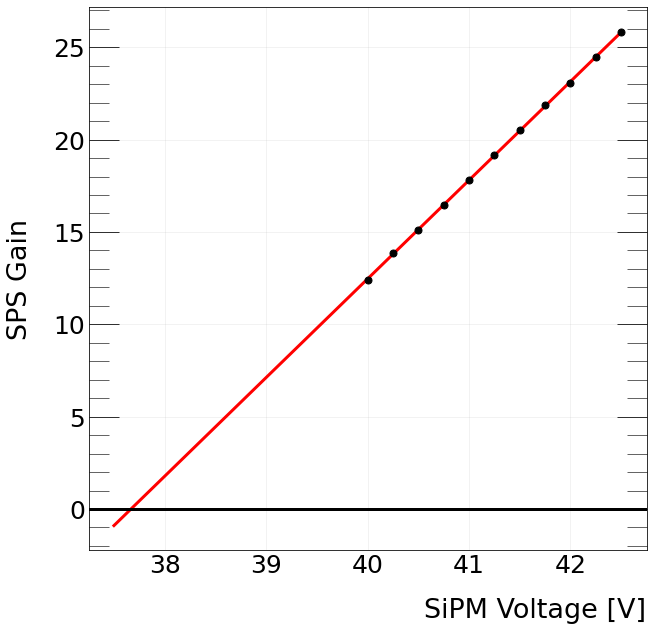

In [46]:
# И график такой же

fig, ax = plt.subplots(1, figsize=[10,10])

plt.errorbar(x=data['SiPM_Voltage'],
             y=data['SPS_Gain'],
             yerr=data['SPS_Gain_err'], fmt='ok',
             elinewidth=2.5,
             markersize=7);

xfine = np.linspace(37.5, 42.5)  # define values to plot the function for

plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('SiPM Voltage [V]', loc='right', fontsize=27, labelpad=20)
plt.ylabel('SPS Gain', fontsize=27, labelpad=20)

plt.plot(xfine, pol1_fit_default(xfine, popt_new[0], popt_new[1]), 'r-', linewidth=3)
plt.axhline(y=0., color='black', linestyle='-', linewidth=3)

#plt.savefig('Gain_BD_Errobar.jpg')